In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
plt.style.use('default')

In [9]:
x = np.linspace(-1,1,100)
y_train = np.cos(2*x)
x = np.asarray(x, np.float32)
y_train = np.asarray(y_train, np.float32)

In [46]:
a0 = tf.Variable(0.813799)
a1 = tf.Variable(0.08708969)
a2 = tf.Variable(-1.1087906)
a3 = tf.Variable( -0.12951978)

eta = 0.000002
start= time()
for i in range(150000):
    with tf.GradientTape() as tape:
        y_hat = a3*x**3 + a2*x**2 + a1*x + a0
        loss = tf.reduce_mean((y_hat - y_train)**2)
    grad_a3, grad_a2, grad_a1, grad_a0 = tape.gradient(loss, [a3, a2, a1, a0])
    a3 = tf.Variable(a3 - eta * grad_a3)
    a2 = tf.Variable(a2 - eta * grad_a2)
    a1 = tf.Variable(a1 - eta * grad_a1)
    a0 = tf.Variable(a0 - eta * grad_a0)
    if (i % 20000 == 0):
        t = time() - start
        print("Epoch:",i, "Coeficientes:",a3.numpy(), a2.numpy() ,a1.numpy(), a0.numpy(),"mse=", loss.numpy(), "time for 1000 epochs ", t)
        start = time()

Epoch: 0 Coeficientes: -0.12951978 -1.1087908 0.08708968 0.8137991 mse= 0.015125876 time for 1000 epochs  0.004029273986816406
Epoch: 20000 Coeficientes: -0.12951978 -1.111175 0.08694067 0.8149912 mse= 0.014955375 time for 1000 epochs  62.86866879463196
Epoch: 40000 Coeficientes: -0.12951978 -1.1135591 0.08679166 0.81618327 mse= 0.014786231 time for 1000 epochs  61.51740312576294
Epoch: 60000 Coeficientes: -0.12951978 -1.1159433 0.086642645 0.81737536 mse= 0.014618444 time for 1000 epochs  61.71393275260925
Epoch: 80000 Coeficientes: -0.12951978 -1.1183275 0.08649363 0.81856745 mse= 0.014452015 time for 1000 epochs  61.088507413864136
Epoch: 100000 Coeficientes: -0.12951978 -1.1207117 0.08634462 0.81954634 mse= 0.014290073 time for 1000 epochs  61.41818451881409
Epoch: 120000 Coeficientes: -0.12951978 -1.1230959 0.08619561 0.82035714 mse= 0.0141317295 time for 1000 epochs  60.77007055282593
Epoch: 140000 Coeficientes: -0.12951978 -1.12548 0.0860466 0.82116795 mse= 0.013974457 time for 

In [47]:
print("a3=",a3.numpy(),"a2=",a2.numpy(), "a1=",a1.numpy(),"a0=",a0.numpy())


a3= -0.12951978 a2= -1.126672 a1= 0.0859721 a0= 0.8215733


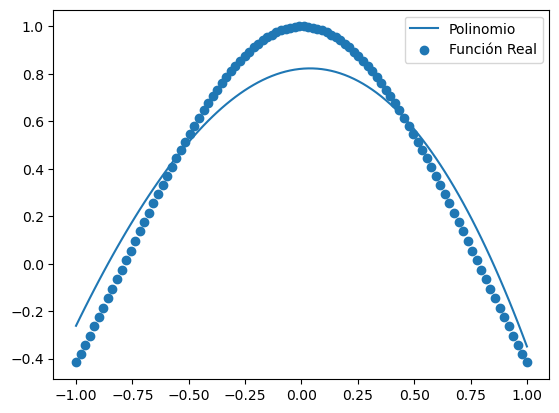

In [48]:
plt.plot(x,a3*x**3 + a2*x**2 + a1*x + a0, label = 'Polinomio')
plt.scatter(x,y_train, label = 'Función Real')
plt.legend()
plt.show()